In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import pickle

In [4]:
def save_model(model,filename):
    pickle.dump(model, open('models/'+filename, 'wb'))

def Model_score(filename):
    loaded_model = pickle.load(open('models/'+filename, 'rb'))
    result = loaded_model.score(X_test, y_test)
    return result

In [5]:
LR_pipe = Pipeline([('logistic',LogisticRegression())])
LR_pipe.fit(X_train,y_train)

C:\Users\Rao\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Rao\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('logistic', LogisticRegression())])

In [6]:
save_model(LR_pipe,'LogisticRegression.sav')

In [7]:
from sklearn.model_selection import GridSearchCV
param4 = {}
param4['max_depth'] = [5,10,25,None]
param4['min_samples_split'] = [2,5,10]
param4['class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
# parameters = {'criterion':['gini'], 'splitter':['best'], 'min_samples_split':[100,200,300,400,500,600,700,800,900], 'random_state':[42]}
clf = GridSearchCV(DecisionTreeClassifier(),param4, cv = 10, return_train_score=False)

In [8]:
clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [None, {0: 1, 1: 5}, {0: 1, 1: 10},
                                          {0: 1, 1: 25}],
                         'max_depth': [5, 10, 25, None],
                         'min_samples_split': [2, 5, 10]})

In [9]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=5)

In [10]:
save_model(clf,'ParameterTuned_DecisionTree.sav')

In [11]:
print('Best Score :',clf.best_score_,'Best Params :',clf.best_params_)

Best Score : 0.6392509229399554 Best Params : {'class_weight': None, 'max_depth': 5, 'min_samples_split': 2}


In [12]:
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier(random_state=42)

In [13]:
clf1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [21]:
param1 = {}
param1['n_estimators'] = [10, 50, 100, 250]
param1['max_depth'] = [5, 10, 20]
param1['class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
# param1['classifier'] = [clf1]

In [15]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [16]:
param1

{'classifier_n_estimators': [10, 50, 100, 250],
 'classifier': [RandomForestClassifier(random_state=42)]}

In [17]:
pipeline = Pipeline([('RandomForest', clf1)])
# params = [param1, param2, param3, param4, param5, param6, param7]
params = [param1]

In [22]:
from sklearn.model_selection import GridSearchCV
# Train the grid search model
gs = GridSearchCV(clf1, param_grid=param1,cv=5, n_jobs=-1, scoring='roc_auc').fit(X_train, y_train)

C:\Users\Rao\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [23]:
gs.best_params_

{'class_weight': None, 'max_depth': 20, 'n_estimators': 250}

In [24]:
save_model(gs,'RandomForest.sav')

In [25]:
import os

models = os.listdir('models/')

In [26]:
score = []
for i in range(0,len(models)):
    score.append(Model_score(models[i]) * 100)

In [28]:
score

[61.08478146392839, 54.976303317535546, 64.82907616598503]

<BarContainer object of 3 artists>

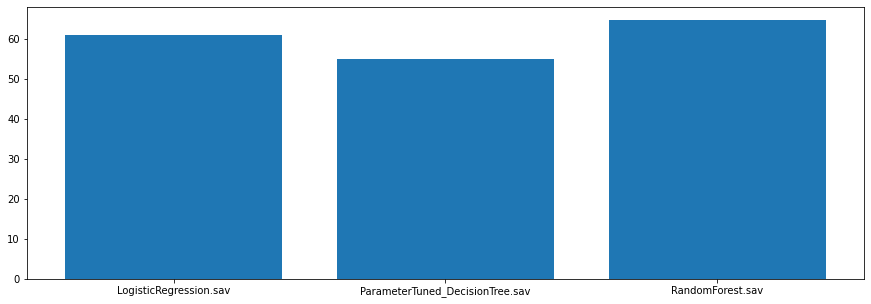

In [27]:
plt.figure(figsize=(15,5))
plt.bar(models,score)